In [99]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import scipy.stats as stats
#load the dataset
file_path = 'recipe_final (1).csv'
recipe_df = pd.read_csv(file_path)

recipe_df.head()

,Unnamed: 0,recipe_id,recipe_name,aver_rate,image_url,review_nums,calories,fat,carbohydrates,protein,cholesterol,sodium,fiber,ingredients_list
0,0,222388,Homemade Bacon,5.00,https://images.media-allrecipes.com/userphotos...,3,15,36,1,42,21,81,2,"['pork belly', 'smoked paprika', 'kosher salt'..."
1,1,240488,"Pork Loin, Apples, and Sauerkraut",4.76,https://images.media-allrecipes.com/userphotos...,29,19,18,10,73,33,104,41,"['sauerkraut drained', 'Granny Smith apples sl..."
2,2,218939,Foolproof Rosemary Chicken Wings,4.57,https://images.media-allrecipes.com/userphotos...,12,17,36,2,48,24,31,4,"['chicken wings', 'sprigs rosemary', 'head gar..."
3,3,87211,Chicken Pesto Paninis,4.62,https://images.media-allrecipes.com/userphotos...,163,32,45,20,65,20,43,18,"['focaccia bread quartered', 'prepared basil p..."
4,4,245714,Potato Bacon Pizza,4.50,https://images.media-allrecipes.com/userphotos...,2,8,12,5,14,7,8,3,"['red potatoes', 'strips bacon', 'Sauce:', 'he..."


In [44]:
recipe_df.describe()

,Unnamed: 0,recipe_id,aver_rate,review_nums,calories,fat,carbohydrates,protein,cholesterol,sodium,fiber
count,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000
mean,24367.000000,131840.514579,4.311393,77.045696,16.422756,25.601149,10.152190,27.651934,19.949338,23.011224,11.038925
std,14068.727021,98524.853219,0.484486,284.401153,10.802746,22.605484,7.925232,29.107178,24.684108,50.872119,11.832147
min,0.000000,6663.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12183.500000,22181.500000,4.080000,6.000000,9.000000,10.000000,4.000000,7.000000,3.000000,6.000000,3.000000
50%,24367.000000,143114.000000,4.410000,18.000000,15.000000,20.000000,9.000000,16.000000,13.000000,14.000000,7.000000
75%,36550.500000,231980.500000,4.620000,54.000000,22.000000,35.000000,14.000000,43.000000,28.000000,30.000000,15.000000
max,48734.000000,262956.000000,5.000000,11191.000000,235.000000,591.000000,280.000000,920.000000,1344.000000,5285.000000,178.000000


In [134]:
recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48735 entries, 0 to 48734
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        48735 non-null  int64  
 1   recipe_id         48735 non-null  int64  
 2   recipe_name       48735 non-null  object 
 3   aver_rate         48735 non-null  float64
 4   image_url         48735 non-null  object 
 5   review_nums       48735 non-null  int64  
 6   calories          48735 non-null  int64  
 7   fat               48735 non-null  int64  
 8   carbohydrates     48735 non-null  int64  
 9   protein           48735 non-null  int64  
 10  cholesterol       48735 non-null  int64  
 11  sodium            48735 non-null  int64  
 12  fiber             48735 non-null  int64  
 13  ingredients_list  48735 non-null  object 
dtypes: float64(1), int64(10), object(3)
memory usage: 5.2+ MB


In [4]:
#showing missing datas
recipe_df.isnull().sum()

Unnamed: 0          0
recipe_id           0
recipe_name         0
aver_rate           0
image_url           0
review_nums         0
calories            0
fat                 0
carbohydrates       0
protein             0
cholesterol         0
sodium              0
fiber               0
ingredients_list    0
dtype: int64

In [6]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer


In [7]:
#converting our feature from the dataset into numerical values
#create obj vectorizer and call fit_transform method 
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer


In [9]:
#creating obj scaler and calling fit.transform method inside scaller with all columns that have numeric value
scaler = StandardScaler()
X_numerical = scaler.fit_transform(recipe_df[['calories', 'fat', 'carbohydrates', 'protein', 'cholesterol', 'fiber']])

In [10]:
#showing numerical points assigned
X_numerical

array([[-0.1317045 ,  0.46001924, -1.15482863,  0.49294416,  0.04256474,
        -0.76393724],
       [ 0.23857551, -0.33625589, -0.01920347,  1.5579845 ,  0.52871248,
         2.53220175],
       [ 0.05343551,  0.46001924, -1.02864806,  0.699081  ,  0.16410167,
        -0.59490447],
       ...,
       [-0.77969453, -0.82286847, -0.27156462, -0.60645231, -0.68665688,
        -0.25683894],
       [ 0.33114552,  0.32730672,  0.73787996, -0.57209617,  0.20461398,
        -0.51038809],
       [-1.33511455, -0.9998185 , -1.02864806, -0.84694529, -0.80819381,
        -0.42587171]])

In [14]:
#combining features
#calling horizontal stack hstack method of numpy library to stack X_numerical and X_ingredients(in array) horizontally
X_combined = np.hstack([X_numerical, X_ingredients.toarray()])

In [15]:
X_combined


array([[-0.1317045 ,  0.46001924, -1.15482863, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.23857551, -0.33625589, -0.01920347, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.05343551,  0.46001924, -1.02864806, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.77969453, -0.82286847, -0.27156462, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33114552,  0.32730672,  0.73787996, ...,  0.        ,
         0.        ,  0.        ],
       [-1.33511455, -0.9998185 , -1.02864806, ...,  0.        ,
         0.        ,  0.        ]])

In [16]:
#train KNN model
# create object for NN -knn
Knn = NearestNeighbors(n_neighbors=3, metric='euclidean')

Knn.fit(X_combined)

NearestNeighbors(metric='euclidean', n_neighbors=3)

In [34]:
#creating recomendation function to recomend recipies
def recommend_recipes(input_features):
    input_features_scaled = scaler.transform([input_features[:6]])
    input_ingredients_transformed = vectorizer.transform([input_features[6]])
    input_combined = np.hstack([input_features_scaled, input_ingredients_transformed.toarray()])

    #calculating nearest neighbor with Knn
    distances, indices = Knn.kneighbors(input_combined)

    #extracting 3 closest predictions name ingredient and image from t he dataset
    recomendations = recipe_df.iloc[indices[0]]
    return recomendations[['recipe_name', 'ingredients_list', 'image_url']]
    
#example input
input_features = [22, 36, 17, 11, 21, 21, 'Sauce, red potatoes, kosher salt']
recomendations = recommend_recipes(input_features)


C:\Users\0o0\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
recomendations

,recipe_name,ingredients_list,image_url
39020,V's Fried Mashed Potatoes,"['red potatoes', 'garlic powder', 'salt to tas...",https://images.media-allrecipes.com/userphotos...
30762,Garlic Mashed Potatoes In The Slow Cooker,"['red potatoes', 'cream cheese', 'sour cream',...",https://images.media-allrecipes.com/userphotos...
32478,Mashed Potato Salad,"['red potatoes', 'Yukon Gold potatoes', 'butte...",https://images.media-allrecipes.com/userphotos...


NameError: name 'plt' is not defined

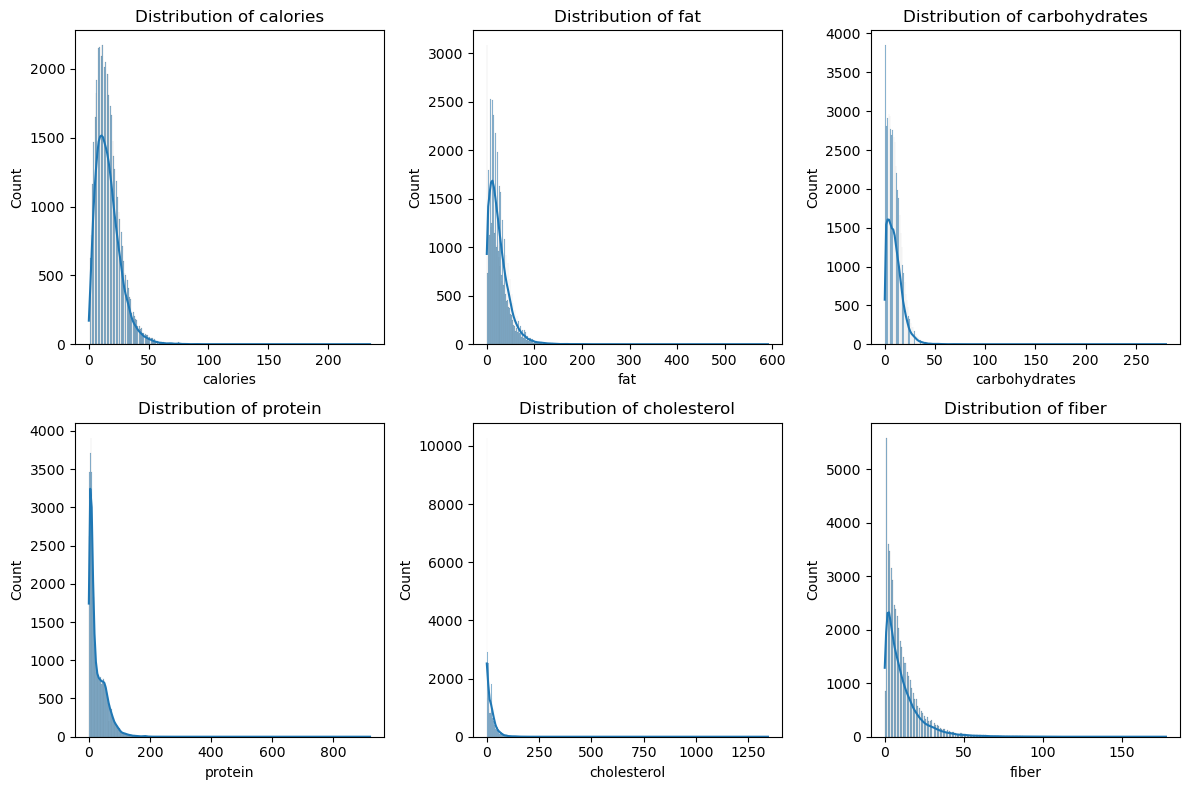

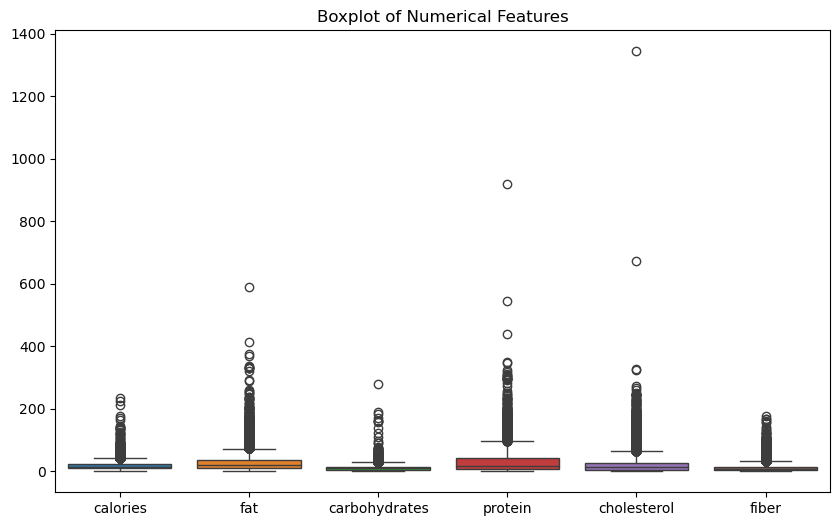

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histograms for numerical features
numerical_columns = ['calories', 'fat', 'carbohydrates', 'protein', 'cholesterol', 'fiber']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(recipe_df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Boxplot for outliers detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=recipe_df[numerical_columns])
plt.title('Boxplot of Numerical Features')
plt.show()
